In [1]:
import pandas as pd
from pandas import DataFrame,Series
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from random import sample

In [11]:
perceptron_dup_train = pd.read_csv('../FeaturesCsvFile/featuresfile.csv')
perceptron_dup_test = pd.read_csv('../FeaturesCsvFile/featuresfile_10.csv')
df1 = perceptron_dup_test.drop_duplicates(subset=['User', 'Timestamp'])
df2 = perceptron_dup_train.drop_duplicates(subset=['User', 'Timestamp'])
frames = [df1, df2]
df= pd.concat(frames)
df.shape

(821, 46)

In [30]:
X = df.values[:, 2:45]
y = df.values[:, 45] #label : walking/runing
y_plot = np.where(y == 'walking', -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_plot, test_size=0.3)
ppn = Perceptron(max_iter=30, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
print('Accuracy of Accuracy Score : %.2f' % accuracy_score(y_test,y_pred))
print('Accuracy of Perceptron Score: %.2f' % ppn.score(X_test,y_test))

Accuracy of Accuracy Score : 0.97
Accuracy of Perceptron Score: 0.97


In [32]:
print ('Important features (featureName, weigh of important, #column)')
header = list(perceptron_train.head(1))
important_feature = []
for i in range(0,len(ppn.coef_[0])):
    important_feature.append((header[i+2],ppn.coef_[0][i],i+2))
sorted_list = sorted(important_feature,key=lambda important_feature: important_feature[1],reverse=True)
for j in range(0,len(sorted_list)):
        first_imp_fea = sorted_list[0]
        second_imp_fea = sorted_list[1]
        print sorted_list[j]

Important features (featureName, weigh of important, #column)
('StdDev-z', 185.56889493405149, 43)
('StdDev-x', 161.12133478561577, 41)
('AvgAbsDiff-z', 153.27951262524317, 37)
('AvgAbsDiff-x', 137.07187728764572, 35)
('StdDev-y', 122.48673837800487, 42)
('AvgAbsDiff-y', 103.3940272084579, 36)
('AvgAcc-z', 36.397275816041891, 40)
('TimeDiffPeaks-x', 27.093988187359958, 32)
('Bin9,x', 3.348462884840623, 10)
('Bin3,y', 2.9102979662311594, 14)
('Bin4,y', 2.806936584433942, 15)
('Bin2,y', 2.2745223274530582, 13)
('Bin8,x', 1.7814050239832402, 9)
('Bin10,x', 1.747888333070434, 11)
('Bin3,z', 1.3464187537191366, 24)
('Bin4,x', 1.1402270081585009, 5)
('Bin2,z', 0.96243999131523816, 23)
('Bin1,z', 0.77752172622129445, 22)
('Bin3,x', 0.77710967143979981, 4)
('Bin2,x', 0.76818537528154518, 3)
('Bin1,y', 0.65102736672288364, 12)
('Bin7,z', 0.53394073372101136, 28)
('Bin6,y', 0.40985893992920736, 17)
('Bin1,x', 0.25539929456708249, 2)
('Bin10,z', 0.16029718184240796, 31)
('Bin4,z', 0.0671773332333

Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.06  0.94]]


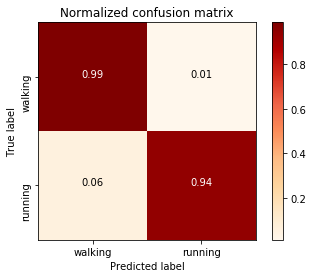

In [34]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.OrRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ["walking", "running"]
# plot_confusion_matrix(cnf_matrix, classes=["walking", "running"],
#                       title='Confusion matrix, without normalization')
# plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()